In [2]:
import numpy as np
import pandas as pd
import json

In [3]:
alltypes = ['plain', 'hto', 'thinlto', 'fulllto', 'noheaders']

def simplifyName(z):
    z = z[z.rindex('/')+1:z.rindex('.')]
    return z

def create_pandas(res, test, trial):
    compiles = []
    names = []
    links = []
    execs = []
    tests = []
    trials = []
    for x in res["tests"]:
        if "metrics" in x:
            compiles.append(x["metrics"]["compile_time"])
            links.append(x["metrics"]["link_time"])
            execs.append(x["metrics"]["exec_time"])
            names.append(simplifyName(x["name"]))
            tests.append(test)
            trials.append(trial)
        else:
            pass
    idx = pd.MultiIndex.from_tuples(zip(names, tests, trials), names=['name', 'test', 'trial'])
    #df = pd.DataFrame(index=idx, data={'compile':compiles, 'link':links, 'exec':execs})
    df = pd.DataFrame(index=idx, data={'name':names, 'compile':compiles, 'link':links, 'exec':execs, 'test':tests, 'trial':trials})
    return df

def getData(test):
    dfs = []
    for i in range(1, 11):
        with open('results-v1/' + test + str(i) + '.json') as json_file:
            res = json.load(json_file)
        res
        dfs.append(create_pandas(res, test, i))
    return pd.concat(dfs)

def getAllData():
    dfs = []
    for test in alltypes:
        dfs.append(getData(test))
    return pd.concat(dfs)
alldata = getAllData()

In [4]:
def plainMean(alldata, test):
    return alldata[(alldata['name']==test) & (alldata['test']=='plain')]['exec'].mean()

In [5]:
htotests = list(z for z in set(alldata[alldata['test']=='hto']['name']) if plainMean(alldata, z) > 0.1)
for h in htotests:
    print(plainMean(alldata, h))

0.6952799999999999
28.613800000000005
2.7743499999999996
1.6287699999999998
1.57613
1.9033200000000001
1.1878099999999998
0.7867599999999999
0.27938
2.85199
2.1646900000000002
0.70792
4.52896
5.29107
2.1767000000000003
13.846950000000001
0.96097
0.66523
0.41193
3.21783
2.13769
1.7851
2.9703700000000004
0.11538999999999999
0.57532
4.114269999999999
2.7596700000000003
31.661780000000004
2.42799
0.5308400000000001
2.04499
0.17114
0.8996999999999999
2.5520499999999995
2.7893999999999997
12.160309999999999
2.1446
2.73307
0.18497999999999998
0.29331
5.100280000000001
0.18705
7.08669
1.0560100000000001
0.29019
1.17679
3.5853499999999996
3.09135
1.59736
3.2704999999999997
5.24059
2.21232
2.76111
0.6592300000000002
0.71818
1.5558100000000001
2.1452999999999998
1.228
2.9955600000000002
0.10621999999999998
2.92115
3.5185700000000004
0.57261
2.25047
0.4514699999999999
0.11383000000000001
0.7126399999999999
2.5834
3.24125
0.12406999999999999
0.33150999999999997
0.2097
0.22081999999999996
5.86557
1.

In [6]:
d = alldata[alldata['name']==htotests[0]]

def getCompileLink(x):
    return x['compile'] + x['link']

alldata.groupby(['name', 'test'])['compile'].mean() + alldata.groupby(['name', 'test'])['link'].mean()

alldata.groupby(['name', 'test'])['exec'].mean()

/Users/wmoses/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: 'name' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  
/Users/wmoses/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: 'test' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  
/Users/wmoses/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: 'name' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  
/Users/wmoses/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: 'test' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  


name             test     
7zip-benchmark   fulllto      6.41803
                 noheaders    6.47277
                 plain        6.46870
                 thinlto      6.44512
8b10b            fulllto      3.15031
                 hto          3.54088
                 noheaders    3.50086
                 plain        3.51857
                 thinlto      3.15288
AMGmk            fulllto      5.29894
                 hto          5.11437
                 noheaders    5.10401
                 plain        5.10028
                 thinlto      5.19331
CLAMR            fulllto      1.99131
                 noheaders    1.98074
                 plain        1.98242
                 thinlto      1.98222
CoMD             fulllto      1.40780
                 hto          1.40208
                 noheaders    1.40538
                 plain        1.39412
                 thinlto      1.41408
ControlFlow-dbl  fulllto      2.95407
                 hto          2.96656
                 nohead

/Users/wmoses/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 'name' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.
/Users/wmoses/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 'test' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


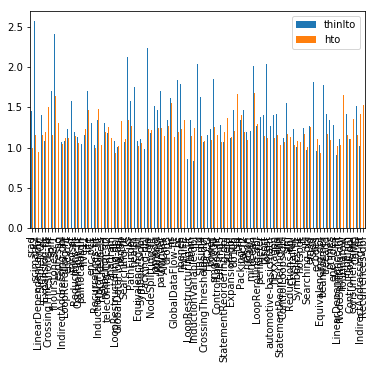

In [7]:
buildtimes = alldata.groupby(['name', 'test'])['compile'].mean() + alldata.groupby(['name', 'test'])['link'].mean()


def toGrid(bt, types=alltypes, tests=htotests, normalize=None):
    rec = [[] for d in types]
    for test in tests:
        for i, d in enumerate(types):
            dat = bt[test, d]
            if normalize is not None:
                dat /= bt[test, normalize]
            rec[i].append(dat)
    return pd.DataFrame({a:b for a, b in zip(types, rec)}, index=tests)

toGrid(buildtimes, types=['thinlto', 'hto'], tests=htotests[:], normalize='noheaders').plot.bar(rot=90)

In [103]:
toGrid(buildtimes, types=['fulllto','thinlto', 'hto'], tests=htotests[:], normalize='noheaders').to_csv('buildtime.csv')

In [9]:
tg = toGrid(buildtimes, types=['fulllto','thinlto', 'hto'], tests=htotests[:], normalize='noheaders')

In [10]:
tg.mean()

fulllto    1.380575
thinlto    1.389967
hto        1.194445
dtype: float64

In [147]:
execg = toGrid(alldata.groupby(['name', 'test'])['exec'].mean(),types=['fulllto','thinlto', 'hto'], tests=htotests[:], normalize='noheaders')
execg.mean()

/Users/wmoses/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 'name' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.
/Users/wmoses/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 'test' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


fulllto    0.979525
thinlto    0.970693
hto        0.988871
dtype: float64

In [148]:
execg['hto'], tg['hto']

(LinearDependence-flt       0.999145
 spiff                      0.998577
 enc-md5                    0.999853
 Symbolics-dbl              1.009592
 ocean                      0.997783
 ControlFlow-flt            1.002115
 bmm                        0.986432
 StatementReordering-flt    0.997801
 mason                      0.994244
 8b10b                      1.011431
 Symbolics-flt              0.925696
 iotest                     1.042740
 siod                       0.985806
 HACCKernels                0.996073
 consumer-lame              0.998573
 SIBsim4                    0.993901
 health                     1.019673
 NodeSplitting-flt          0.996217
 scimark2                   0.996818
 NodeSplitting-dbl          0.996087
 ecbdes                     0.999360
 miniFE                     1.001158
 SimpleMOC                  0.995034
 miniGMG                    0.986875
 Recurrences-flt            0.995286
 power                      0.985281
 CrossingThresholds-flt     0.946314
 

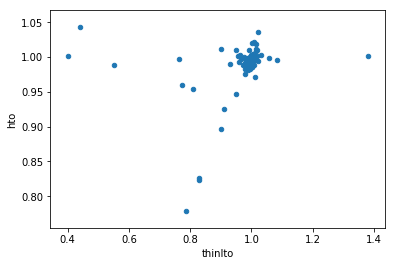

In [149]:
execg.plot.scatter('thinlto', 'hto')

In [150]:
execg['thinlto'], tg['thinlto']

(LinearDependence-flt       0.990496
 spiff                      0.979947
 enc-md5                    1.006614
 Symbolics-dbl              0.991059
 ocean                      0.989820
 ControlFlow-flt            1.007988
 bmm                        0.984182
 StatementReordering-flt    1.004275
 mason                      0.995901
 8b10b                      0.900602
 Symbolics-flt              0.911063
 iotest                     0.439334
 siod                       1.001890
 HACCKernels                0.996134
 consumer-lame              0.988507
 SIBsim4                    1.005275
 health                     1.001300
 NodeSplitting-flt          0.999716
 scimark2                   0.765046
 NodeSplitting-dbl          0.996967
 ecbdes                     1.010329
 miniFE                     0.997449
 SimpleMOC                  1.022250
 miniGMG                    0.982800
 Recurrences-flt            1.001009
 power                      1.001769
 CrossingThresholds-flt     0.949413
 